## predicting house prices based on featires with ANN and Deep neural Nework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("resources/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## evaluating the target

In [6]:
import seaborn as sns 

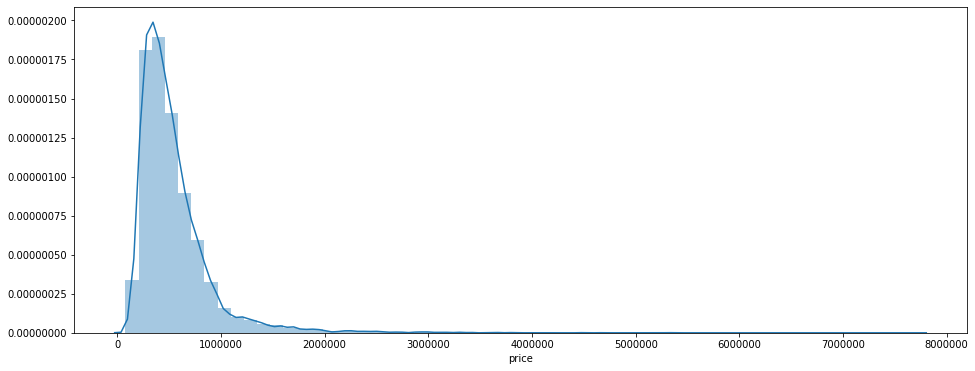

In [7]:
plt.figure(figsize=(16,6))
sns.distplot(data["price"], bins = 60)

## eveluating number of bedrooms

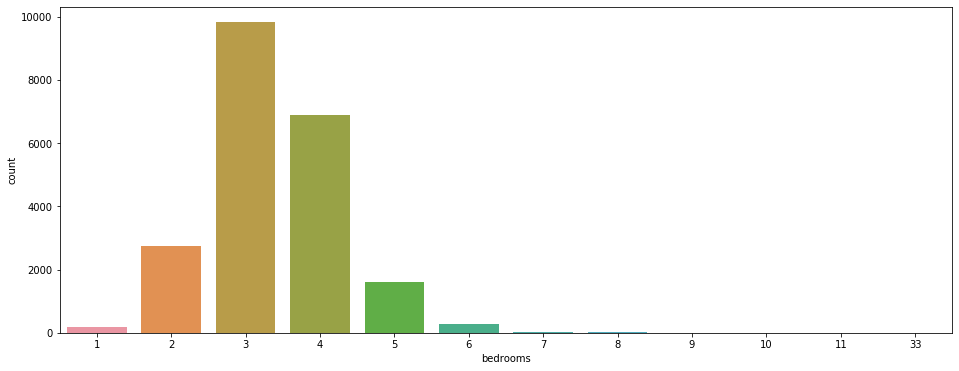

In [8]:
plt.figure(figsize=(16,6))
sns.countplot(x="bedrooms" , data= data)

### lets compare target correlation to all other data

In [9]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


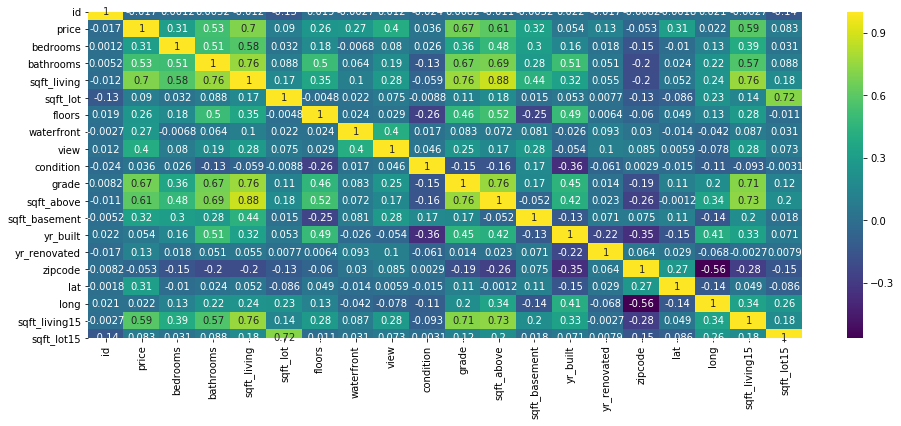

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), cmap="viridis", annot=True)

### looks like the ios a strong correlation to the price and the sqft_living..Lets plot this below

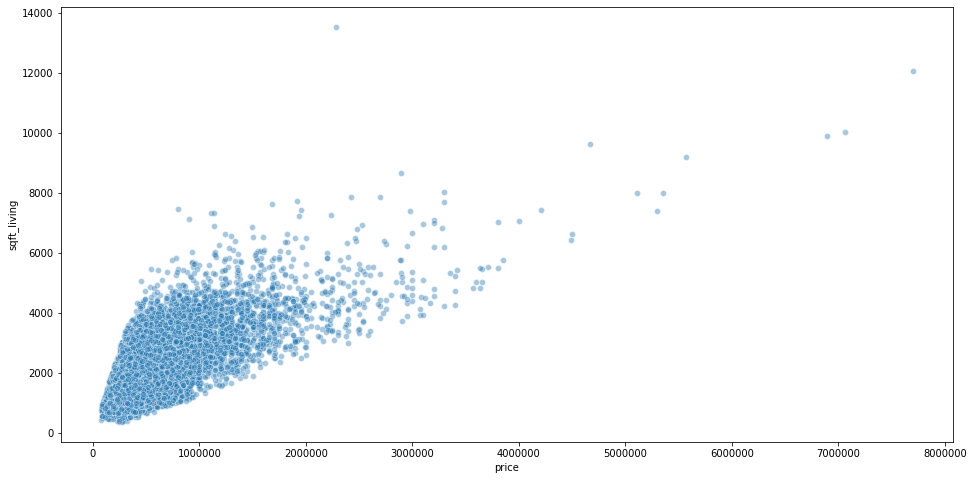

In [11]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = "price", y = "sqft_living", data=data, alpha=0.4)

## Bedrooms

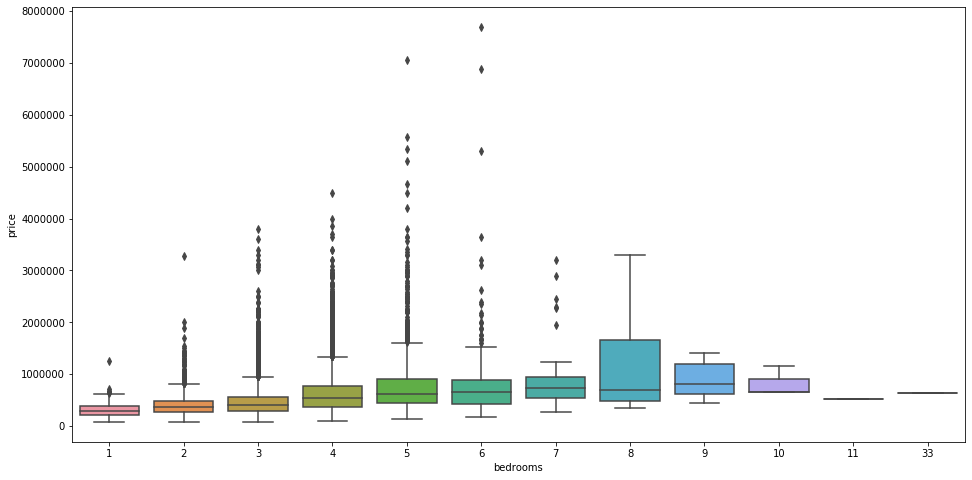

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "bedrooms", y = "price", data=data)

## since we are not Using a geo library lets see if the matplotlib library can help us find where houses are mose expensice in the are we are observing


#### WE can see that prices are higher in the areas of a long of -122.2

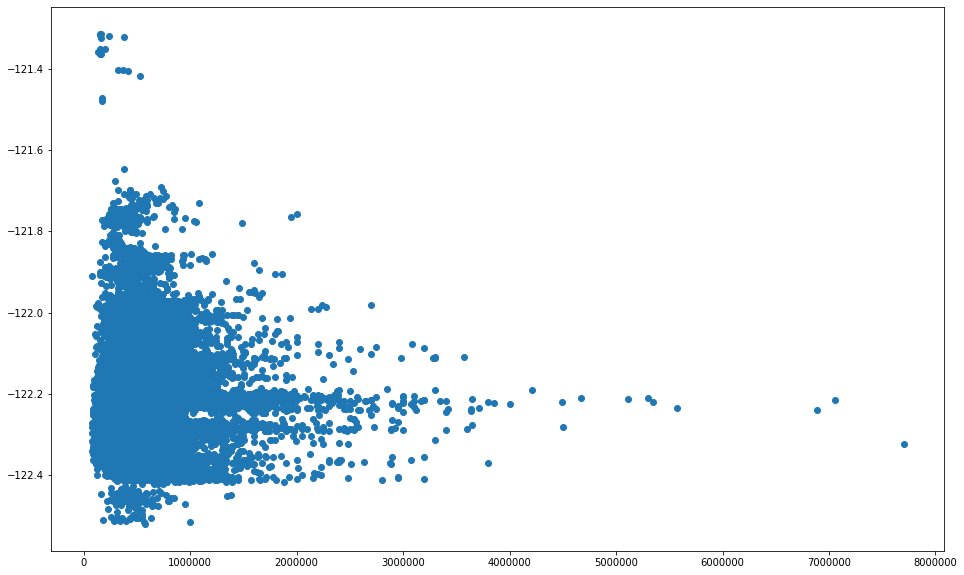

In [13]:
plt.figure(figsize=(16,10))
plt.scatter(x = "price", y = "long", data= data)

### lat -. higher prices around 47.6 and 47.7 

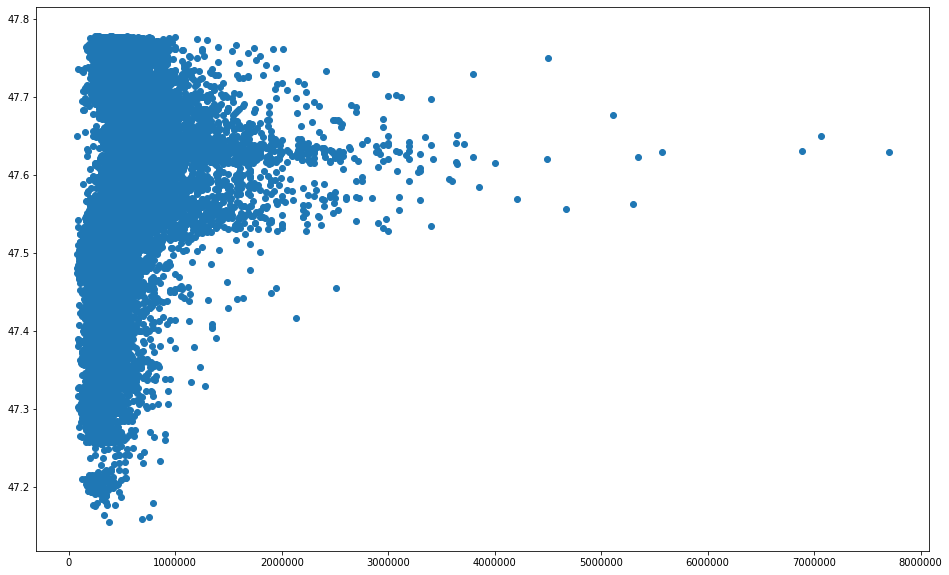

In [14]:
plt.figure(figsize=(16,10))
plt.scatter(x = "price", y = "lat", data= data)

## lets look at the total loong and lat -> this actually shoud draw a scatter map uing the data. We will need to remove the outlyers to get the proper hue but will assume that the most expensive homes are in that area  

In [15]:
data_no_outliers = data[data["price"] < 2000000]

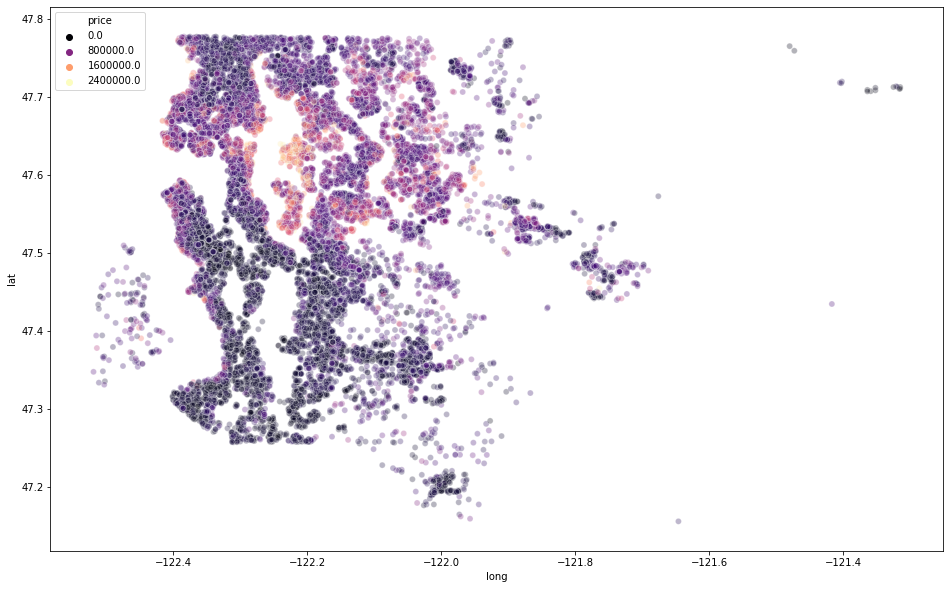

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "long", y = "lat", data= data_no_outliers, hue="price", palette="magma", alpha=0.3)

## appears the more expensice homes are on the waterfront. Let plot this to see what homes are on the waterfront

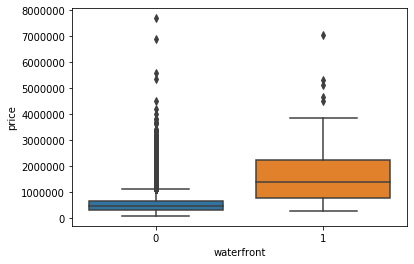

In [17]:
sns.boxplot(x = "waterfront", y = "price", data=data)

### Feature engineering - drop ID,

In [18]:
data = data.drop("id", axis=1)

In [19]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
data["date"] = pd.to_datetime(data["date"])

In [21]:
data["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [22]:
data["month"] = data["date"].apply(lambda x: x.month)
data["year"] = data["date"].apply(lambda x: x.year)

In [23]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


### lets look at the distribution of the prices per month to see if there are any price incrases per month. We dont get a major difference in the diatribution for each month. lets look at the numbers instead of the graph

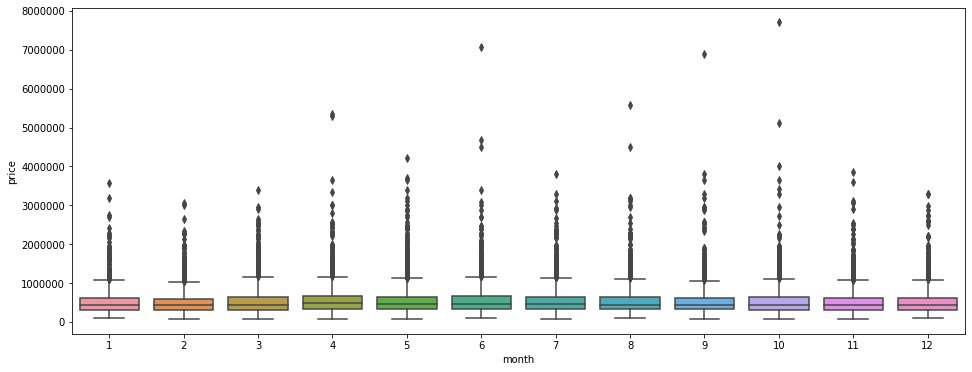

In [24]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "month", y = "price", data = data)

In [25]:
 data.groupby("month").mean()["price"]

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

## looks like there is some patterns with months but seems like feb is a good month to buy a home

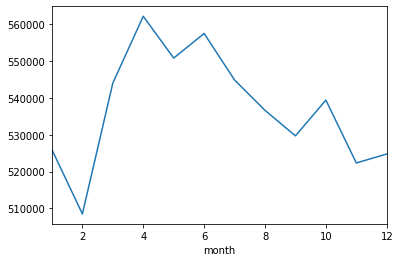

In [26]:
 data.groupby("month").mean()["price"].plot()

## since we have featured engineered the date getting the month and year we can remove the date column

In [27]:
data.drop("date", axis=1, inplace = True)

In [28]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


In [29]:
data.drop("zipcode", inplace=True, axis=1)

In [30]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


#### Seperate features from label

In [31]:
X = data.drop("price", axis=1).values
y = data["price"].values

### Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling -> we want to scale post splitting..that way we only fit to the training set to prevent data leakage form the test set

In [34]:
from sklearn.preprocessing import MinMaxScaler

### min max scalar scales based on the atandard deviation of the data. Scaling training and testing set

In [35]:
scalar = MinMaxScaler()

In [36]:
X_train = scalar.fit_transform(X_train)

In [37]:
X_test = scalar.transform(X_test)

### Creat the model. We will base the number of neurons based on the size of the feature data. So we will look the the number of columns in the training set - 19 

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
X_train.shape

(15117, 19)

## WE should have 19 neurons in our layer

In [40]:
model = Sequential()

model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

## let train our model.. Validation data track as we go through each epoch and check againt the test set to see if we are overfitting..because this is a larger data set we will feed in data in batch -> common to do power of 2 values.The smaller the batch size the longer trianing take but the less likely you will overfit. Large number of epochs -> so we can compare the training performance to the test data val_loss

In [41]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 3s 166us/sample - loss: 430241739793.8152 - val_loss: 418926047403.9308
Epoch 2/400
15117/15117 [==============================] - 1s 49us/sample - loss: 429198239517.3477 - val_loss: 415178050279.3481
Epoch 3/400
15117/15117 [==============================] - 1s 48us/sample - loss: 413408532845.3804 - val_loss: 378547565160.9284
Epoch 4/400
15117/15117 [==============================] - 1s 49us/sample - loss: 334266947506.1010 - val_loss: 250448145997.1161
Epoch 5/400
15117/15117 [==============================] - 1s 49us/sample - loss: 178985802929.8130 - val_loss: 112248244663.9407
Epoch 6/400
15117/15117 [==============================] - 1s 50us/sample - loss: 102983665674.1607 - val_loss: 95169818553.2049
Epoch 7/400
15117/15117 [==============================] - 1s 50us/sample - loss: 97549604700.2088 - val_loss: 93712716140.0889
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 1s 48us/sample - loss: 39218581407.8116 - val_loss: 37978368804.0296
Epoch 65/400
15117/15117 [==============================] - 1s 49us/sample - loss: 38998777518.9342 - val_loss: 37738431768.6519
Epoch 66/400
15117/15117 [==============================] - 1s 50us/sample - loss: 38743935656.6345 - val_loss: 37497256072.5333
Epoch 67/400
15117/15117 [==============================] - 1s 49us/sample - loss: 38545262924.4596 - val_loss: 37289704506.1531
Epoch 68/400
15117/15117 [==============================] - 1s 47us/sample - loss: 38355393840.8901 - val_loss: 37092187173.9259
Epoch 69/400
15117/15117 [==============================] - 1s 49us/sample - loss: 38173999177.6993 - val_loss: 36929800111.0914
Epoch 70/400
15117/15117 [==============================] - 1s 48us/sample - loss: 37998513807.9100 - val_loss: 36823898329.4420
Epoch 71/400
15117/15117 [==============================] - 1s 50us/sample - loss: 37776558783.1236 - val_loss

15117/15117 [==============================] - 1s 47us/sample - loss: 33085368031.7735 - val_loss: 31569950183.9802
Epoch 128/400
15117/15117 [==============================] - 1s 47us/sample - loss: 33058280997.9673 - val_loss: 31504116359.2691
Epoch 129/400
15117/15117 [==============================] - 1s 47us/sample - loss: 33011124483.4377 - val_loss: 31531970175.6840
Epoch 130/400
15117/15117 [==============================] - 1s 47us/sample - loss: 33116594049.7358 - val_loss: 31470575889.0667
Epoch 131/400
15117/15117 [==============================] - 1s 49us/sample - loss: 32972108171.5917 - val_loss: 31402302926.6963
Epoch 132/400
15117/15117 [==============================] - 1s 48us/sample - loss: 32901136374.5166 - val_loss: 31350161863.1111
Epoch 133/400
15117/15117 [==============================] - 1s 50us/sample - loss: 32862275676.3273 - val_loss: 31297169706.3506
Epoch 134/400
15117/15117 [==============================] - 1s 48us/sample - loss: 32873896944.6234 - v

15117/15117 [==============================] - 1s 47us/sample - loss: 31539445138.8397 - val_loss: 29677230393.5210
Epoch 191/400
15117/15117 [==============================] - 1s 47us/sample - loss: 31589741556.9587 - val_loss: 29657600829.3136
Epoch 192/400
15117/15117 [==============================] - 1s 46us/sample - loss: 31478792319.4835 - val_loss: 29663791781.6099
Epoch 193/400
15117/15117 [==============================] - 1s 46us/sample - loss: 31494708769.2256 - val_loss: 29674775610.1531
Epoch 194/400
15117/15117 [==============================] - 1s 47us/sample - loss: 31476159514.7566 - val_loss: 29645496107.6148
Epoch 195/400
15117/15117 [==============================] - 1s 46us/sample - loss: 31457657648.9917 - val_loss: 29571360732.6025
Epoch 196/400
15117/15117 [==============================] - 1s 47us/sample - loss: 31452873672.9288 - val_loss: 29634595422.8148
Epoch 197/400
15117/15117 [==============================] - 1s 46us/sample - loss: 31498909780.3003 - v

15117/15117 [==============================] - 1s 48us/sample - loss: 30667248266.0168 - val_loss: 28679322646.7556
Epoch 254/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30648761631.2782 - val_loss: 28752694406.0049
Epoch 255/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30691137825.5813 - val_loss: 28663481907.8321
Epoch 256/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30648613340.3358 - val_loss: 28592663832.6519
Epoch 257/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30671370059.5451 - val_loss: 28581077699.9506
Epoch 258/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30645116583.1612 - val_loss: 28586800317.6296
Epoch 259/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30674564244.8211 - val_loss: 28640955778.8444
Epoch 260/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30604435121.6437 - v

15117/15117 [==============================] - 1s 47us/sample - loss: 30025507752.2112 - val_loss: 27794527821.1161
Epoch 317/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30002395326.0060 - val_loss: 27784191322.3901
Epoch 318/400
15117/15117 [==============================] - 1s 46us/sample - loss: 30055818018.0216 - val_loss: 27757701807.7235
Epoch 319/400
15117/15117 [==============================] - 1s 47us/sample - loss: 29984497705.5913 - val_loss: 27792344637.9457
Epoch 320/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29980206797.4164 - val_loss: 27737637541.6099
Epoch 321/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29967979951.5608 - val_loss: 27725061678.7753
Epoch 322/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30019497598.0271 - val_loss: 27710294875.6543
Epoch 323/400
15117/15117 [==============================] - 1s 47us/sample - loss: 29934564810.4867 - v

15117/15117 [==============================] - 1s 47us/sample - loss: 29383281986.5021 - val_loss: 27010144281.2840
Epoch 380/400
15117/15117 [==============================] - 1s 47us/sample - loss: 29352266960.8372 - val_loss: 27034906507.6938
Epoch 381/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29353283119.6539 - val_loss: 26995307684.3457
Epoch 382/400
15117/15117 [==============================] - 1s 47us/sample - loss: 29320387905.9602 - val_loss: 26988373414.2420
Epoch 383/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29368350882.4365 - val_loss: 26949756670.1037
Epoch 384/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29322073472.8213 - val_loss: 26993073983.8420
Epoch 385/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29311674014.2028 - val_loss: 26969900216.5728
Epoch 386/400
15117/15117 [==============================] - 1s 47us/sample - loss: 29338988703.8624 - v

## lets check how outr model performed. Explor on the evaluation on the training data. Explor what the model history looks like. since ewe used the test set we can get the model loss for the validation data also. We will compare the loos on the train set as well as the validation set to see if we are overfitting the data for out model

In [42]:
pdd = pd.DataFrame(model.history.history)

In [43]:
pdd

,loss,val_loss
0,4.302417e+11,4.189260e+11
1,4.291982e+11,4.151781e+11
2,4.134085e+11,3.785476e+11
3,3.342669e+11,2.504481e+11
4,1.789858e+11,1.122482e+11
...,...,...
395,2.921792e+10,2.681577e+10
396,2.922651e+10,2.688685e+10
397,2.920867e+10,2.696030e+10
398,2.917957e+10,2.679669e+10


### inspecting losses. This is what we want to see, where the loss for the training data and th evalidation loss...Decreae in traiing and validtion. IF there is no increase in val set we can assume we can keep training without overfitting..If the orange line began to spike that means we are overfitting to training data. (early stoping process my be needed)

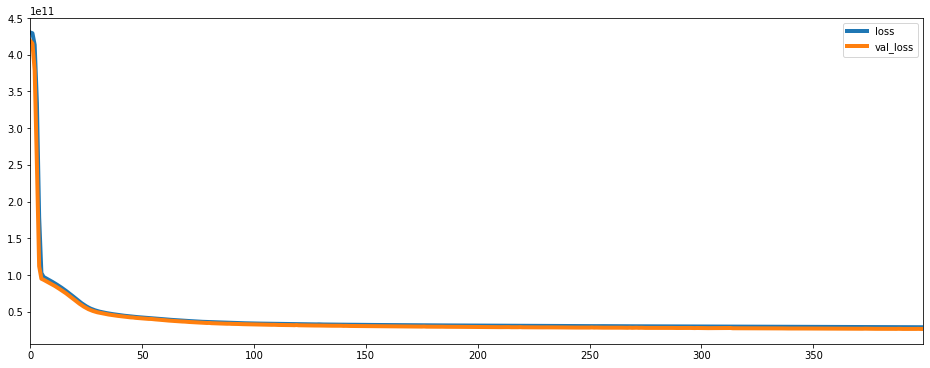

In [44]:
pdd.plot(figsize = (16,6), lw = 4)

## lets evaluation the  test data 

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [46]:
predict = model.predict(X_test)

In [47]:
mean_absolute_error(y_test, predict)

102133.58503568673

In [48]:
mean_squared_error(y_test, predict)

26868380149.25414

In [49]:
import numpy as np

In [50]:
np.sqrt(mean_squared_error(y_test,predict))

163915.77150858345

## Evaluation -> this is not that great based on our mean absolute error since we seem to be off by 20 percent of tthe average price of house in our data. lets take a look that the explained variance score also. This tells us how much variance is being explained by our model. 

In [51]:
explained_variance_score(y_test,predict)

0.7978078539623382

## lets plot out prediciton vs out true values. In a perfect world the redline is what we want. we are being punished by th e outliers.  Seems tht we have some predicitons for houses under 2M dollars. we may need to retrain the model withour the outliers

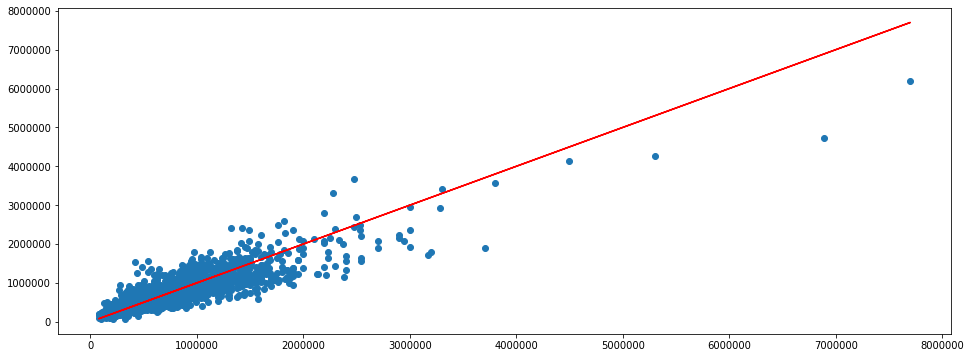

In [52]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predict)
plt.plot(y_test,y_test, c= "r")

### how would e predict on a brand new house. We will take one of the hoises form the data to predict what the price would be as if we did not know

## - 1 just means keep the old dimentions along the axis

In [60]:
from random import randint
random_index = randint(1, len(data))
single_house = single_house = data.drop("price", axis=1).iloc[random_index]

In [61]:
single_house = scalar.transform(single_house.values.reshape(-1,19))

##### True value below is 221900 and we predicted 292412. Looks like we are overshooting here so we may want  to go back an and retrain out data and remove the outliers

In [62]:
model.predict(single_house)

array([[995534.8]], dtype=float32)

In [65]:
data.iloc[random_index]["price"]

775000.0

### Difference

In [68]:
error = (model.predict(single_house) - data.iloc[random_index]["price"])

## model is predicting 220,534 off 
- WE will need ot improve this 

In [69]:
error

array([[220534.81]], dtype=float32)

### Data Update
- WE will remove the Outliers from the data to assist with better predicitons
- below we can see the majority of homes range between up to 200,000
- we will set this range for our new data set to improve our model

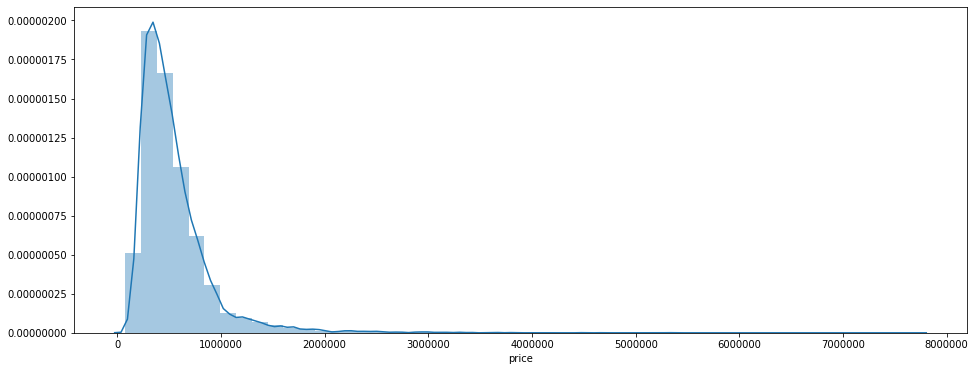

In [97]:
plt.figure(figsize=(16,6))
sns.distplot(data["price"], bins =50)

In [136]:
new_data = data[data["price"] < 200000]   

## 200K cap
- we can see the cap on 200K on a home

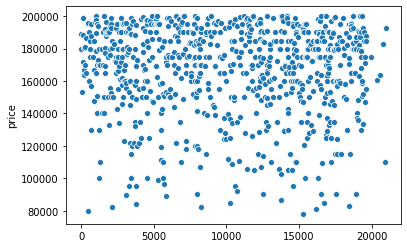

In [137]:
sns.scatterplot(x = new_data.index, y = "price", data=new_data)

In [138]:
X = new_data.drop("price", axis=1).values
y = new_data["price"].values

### Training, Testing, Splitting

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [140]:
new_scalar = MinMaxScaler()

In [141]:
X_train = new_scalar.fit_transform(X_train)

In [142]:
X_test = new_scalar.transform(X_test)

### Model Update
- We will add early stopping, extend the epochs, Validation data , as well as a Dropout layer

In [169]:
from tensorflow.keras.callbacks import EarlyStopping

In [170]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=25)

In [171]:
from tensorflow.keras.layers import Dropout

In [277]:
model = Sequential()
model.add(Dense(units =50, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

In [278]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=700,callbacks=[stop])

Train on 548 samples, validate on 235 samples
Epoch 1/700
548/548 [==============================] - 1s 3ms/sample - loss: 28206781073.7518 - val_loss: 28748285838.7064
Epoch 2/700
548/548 [==============================] - 0s 452us/sample - loss: 28206395332.2044 - val_loss: 28747697888.4085
Epoch 3/700
548/548 [==============================] - 0s 448us/sample - loss: 28205401917.6642 - val_loss: 28745918036.9702
Epoch 4/700
548/548 [==============================] - 0s 437us/sample - loss: 28202481170.6861 - val_loss: 28740676411.9149
Epoch 5/700
548/548 [==============================] - 0s 447us/sample - loss: 28194156723.3869 - val_loss: 28727095147.8468
Epoch 6/700
548/548 [==============================] - 0s 442us/sample - loss: 28173809858.3358 - val_loss: 28695077561.1915
Epoch 7/700
548/548 [==============================] - 0s 453us/sample - loss: 28129633571.5036 - val_loss: 28628232418.5872
Epoch 8/700
548/548 [==============================] - 0s 444us/sample - loss: 28

Epoch 67/700
548/548 [==============================] - 0s 442us/sample - loss: 2085179706.8613 - val_loss: 935672570.8255
Epoch 68/700
548/548 [==============================] - 0s 433us/sample - loss: 1918301770.7445 - val_loss: 927843784.4426
Epoch 69/700
548/548 [==============================] - 0s 423us/sample - loss: 1949743701.4891 - val_loss: 928269585.7021
Epoch 70/700
548/548 [==============================] - 0s 459us/sample - loss: 1872525850.1606 - val_loss: 919956801.3617
Epoch 71/700
548/548 [==============================] - 0s 431us/sample - loss: 1928688790.4234 - val_loss: 922268147.7447
Epoch 72/700
548/548 [==============================] - 0s 433us/sample - loss: 2015767900.0292 - val_loss: 915708971.0298
Epoch 73/700
548/548 [==============================] - 0s 439us/sample - loss: 1923756871.0073 - val_loss: 908391647.0468
Epoch 74/700
548/548 [==============================] - 0s 432us/sample - loss: 2037518571.4453 - val_loss: 896530984.8511
Epoch 75/700
548

548/548 [==============================] - 0s 433us/sample - loss: 1887627437.7810 - val_loss: 925571609.3277
Epoch 134/700
548/548 [==============================] - 0s 445us/sample - loss: 1679166534.0730 - val_loss: 947437910.8766
Epoch 135/700
548/548 [==============================] - 0s 444us/sample - loss: 1959418714.6277 - val_loss: 900771782.2638
Epoch 136/700
548/548 [==============================] - 0s 434us/sample - loss: 1796711082.0438 - val_loss: 871719396.7660
Epoch 137/700
548/548 [==============================] - 0s 441us/sample - loss: 1775316161.2847 - val_loss: 876823535.3872
Epoch 138/700
548/548 [==============================] - 0s 423us/sample - loss: 1770883370.9781 - val_loss: 888142105.0553
Epoch 139/700
548/548 [==============================] - 0s 430us/sample - loss: 1870824425.5766 - val_loss: 953043085.3447
Epoch 140/700
548/548 [==============================] - 0s 451us/sample - loss: 1830065454.7153 - val_loss: 937181117.8213
Epoch 141/700
548/548 

548/548 [==============================] - 0s 440us/sample - loss: 1738310251.4453 - val_loss: 866814683.2340
Epoch 200/700
548/548 [==============================] - 0s 442us/sample - loss: 1814238125.7810 - val_loss: 879784609.2255
Epoch 201/700
548/548 [==============================] - 0s 477us/sample - loss: 1828080628.7883 - val_loss: 870296881.2936
Epoch 202/700
548/548 [==============================] - 0s 439us/sample - loss: 1792320355.0365 - val_loss: 860073186.5872
Epoch 203/700
548/548 [==============================] - 0s 441us/sample - loss: 1917528001.4015 - val_loss: 868985666.7234
Epoch 204/700
548/548 [==============================] - 0s 442us/sample - loss: 1960887693.0803 - val_loss: 900675120.7489
Epoch 205/700
548/548 [==============================] - 0s 440us/sample - loss: 1771417835.4453 - val_loss: 913268316.3234
Epoch 206/700
548/548 [==============================] - 0s 445us/sample - loss: 1868824637.6642 - val_loss: 883671870.9106
Epoch 207/700
548/548 

548/548 [==============================] - 0s 446us/sample - loss: 1695687891.1533 - val_loss: 847686519.5574
Epoch 266/700
548/548 [==============================] - 0s 450us/sample - loss: 1678533996.3796 - val_loss: 860794867.7447
Epoch 267/700
548/548 [==============================] - 0s 448us/sample - loss: 1877115932.0292 - val_loss: 862258170.8255
Epoch 268/700
548/548 [==============================] - 0s 440us/sample - loss: 1709131307.9124 - val_loss: 870253612.6638
Epoch 269/700
548/548 [==============================] - 0s 430us/sample - loss: 1882780218.8613 - val_loss: 879546762.3489
Epoch 270/700
548/548 [==============================] - 0s 448us/sample - loss: 1655056249.4599 - val_loss: 853757499.0979
Epoch 271/700
548/548 [==============================] - 0s 438us/sample - loss: 1723137890.1022 - val_loss: 866227410.2468


### Model Performance -> New Model
- Lets see how the new training did with lower batch size, higher epoch, early stopping and a dropout layer
- Looks like we made great improvment 
- mean absolute error went form 100K to 31K
- We will test the predictive power of this new model below

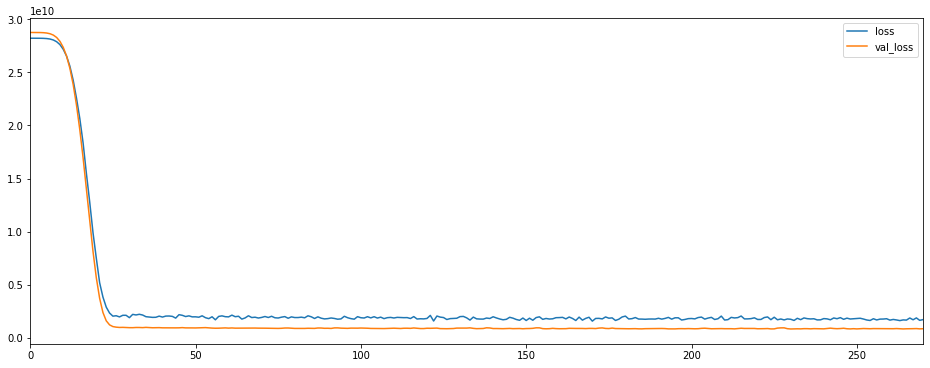

In [279]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [280]:
predict = model.predict(X_test)

In [281]:
mean_absolute_error(y_test, predict)

23873.05944148936

In [282]:
explained_variance_score(y_test, predict)

0.04456287332428299

## preditions

In [306]:
random_index = randint(1, len(new_data))
new_home = new_data.drop("price", axis=1).iloc[random_index]

In [307]:
new_home = new_scalar.transform(new_home.values.reshape(1,19))

In [308]:
model.predict(new_home)

array([[180528.45]], dtype=float32)

## Actual Price

In [309]:
new_data.iloc[random_index]["price"]

180000.0